# PROJECT - FMST

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy.stats import zscore
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

C:\Users\mpani\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the dataframe
concrete_data = pd.read_csv('concrete.csv')

In [3]:
#Checking first few rows
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
#Checking shape of data
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
#Checking for missing value
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

Findings from the data
1. The shape suggests there are 1030 records and 9 attributes
2. The datatype of the attributes are float except for age which is integer. Thus, all are numeric in nature.
3. There are no missing values in the dataset.

In [7]:
#description of attributes
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Here, slag,ash and superplastic have 0 values. The value of these can be equal to 0. Hence not replacing the values.

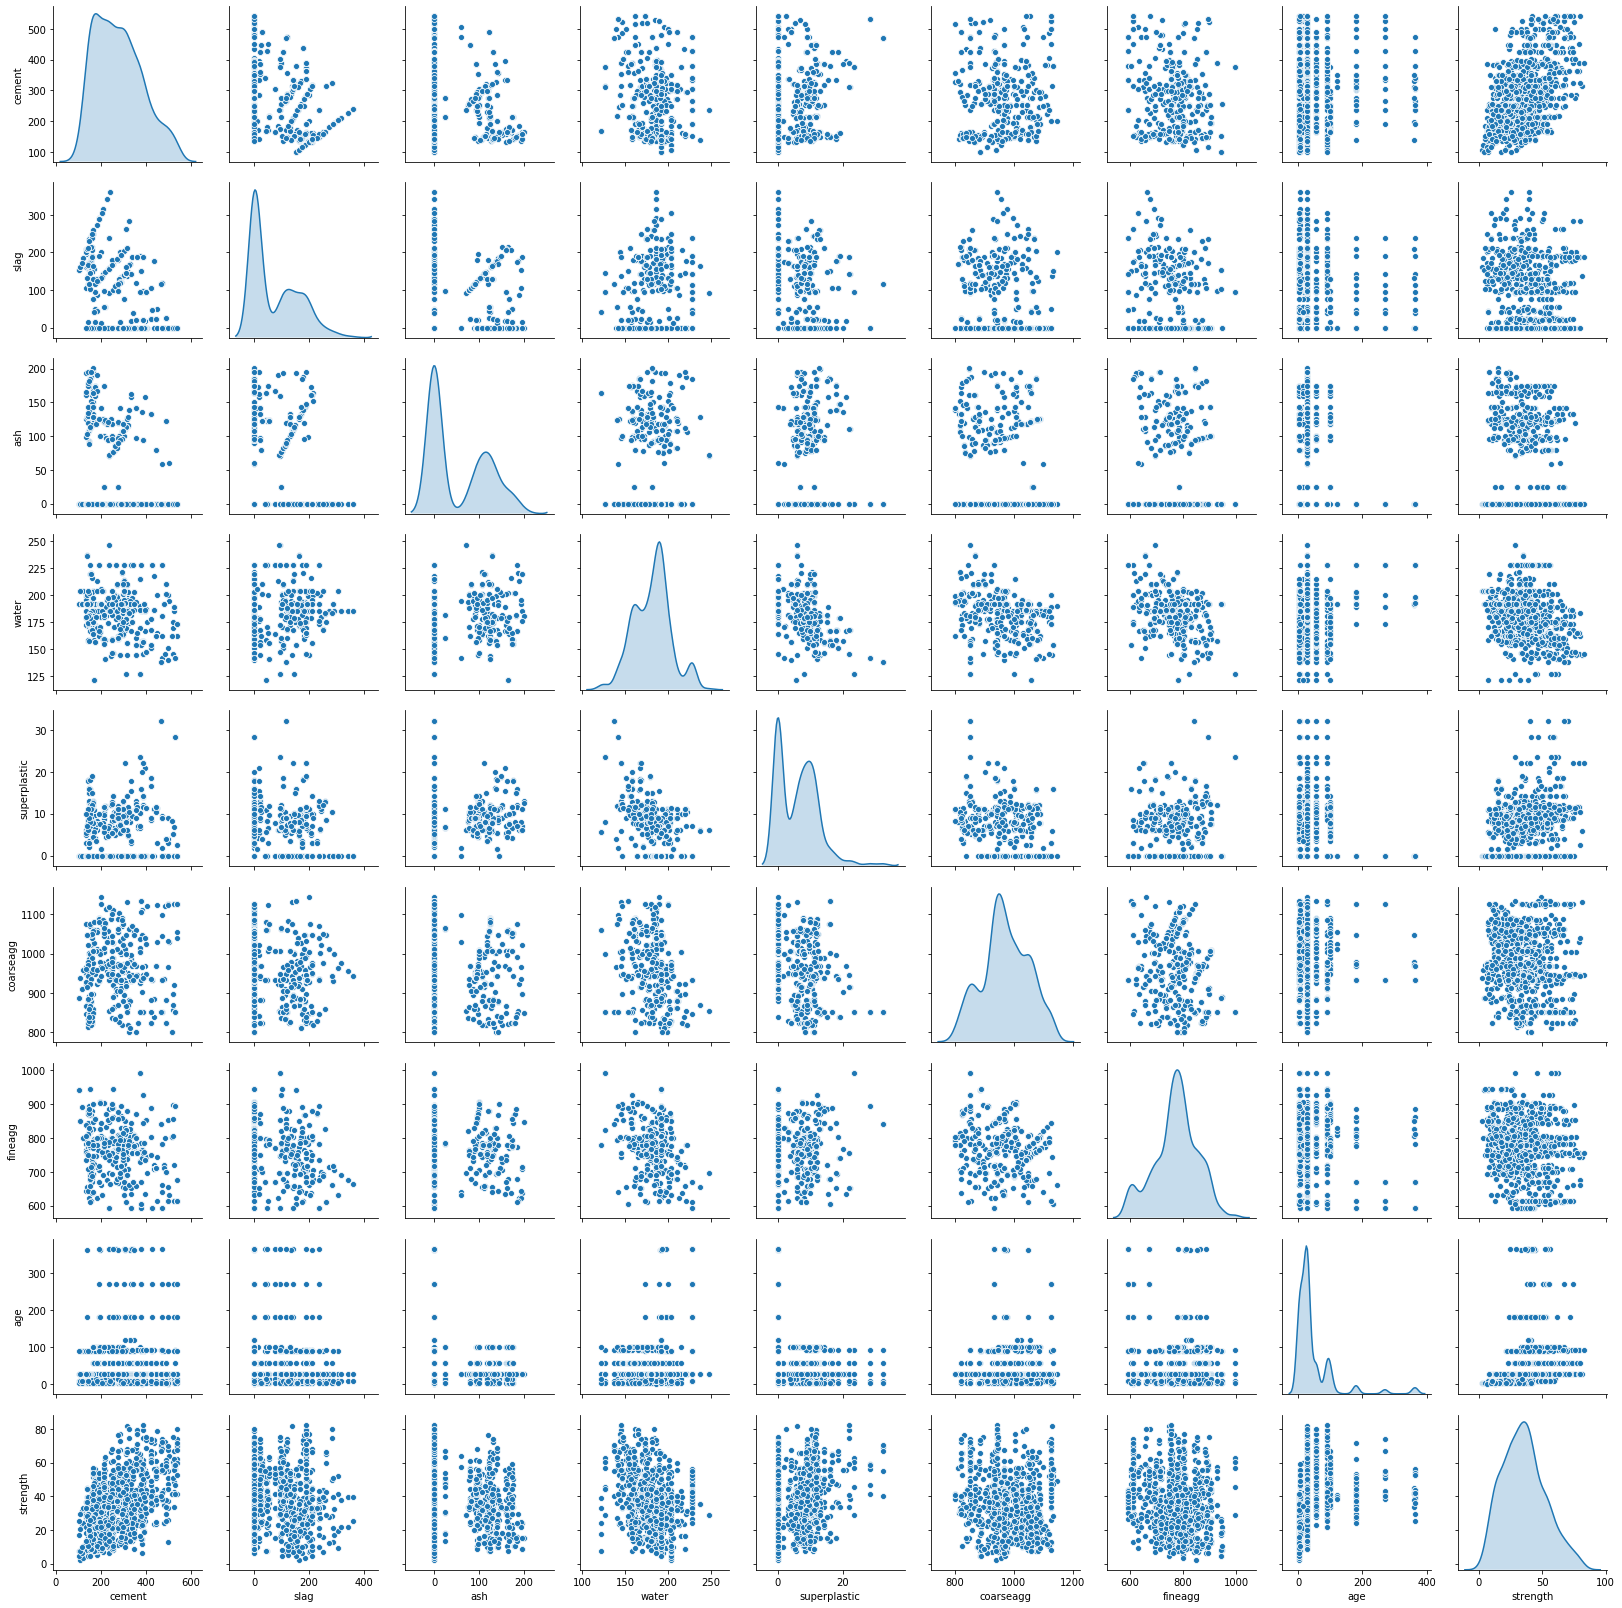

In [8]:
#Pairplot for dataset
sns.pairplot(concrete_data, diag_kind='kde')

In [9]:
concrete_data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

From the pair plot,
1. There seems to be a minimum of 5 gaussians and a maximum of (5x3) ie 15 gaussians.
2. The relation with the dependent variable ie strength:
   a. As the amount of cement increases, there seems to be increase in the strength.
   b. The strenghth seems to be increasing with age too.
   c. The rest of the independent variables don't seem to be showing any visual relation to target variable.

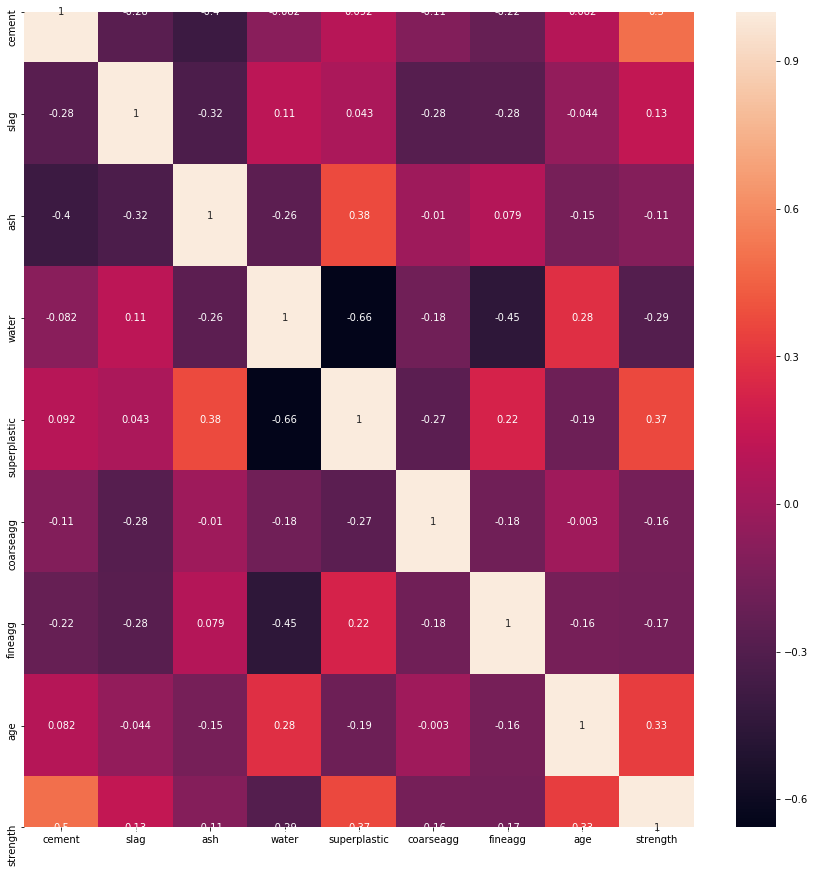

In [10]:
#Correlation matrix
Corr = concrete_data.corr()
figure (figsize = (15,15))
sns.heatmap(Corr, annot = True)

From 5 point summary, pair plot and heat map we observe:
1. The presence of multiple gaussians may mean data was consolitaled from multiple data sets or that there are multiple clusters in the dataset. Here we can observe 5 gaussians in the case of age and 2 or 3 gaussias in the rest. Thus, there could be 5 or more clusters or the dataset might just be a mix up of various datasets.
2. Cement, slag, ash, superplastic, age, strength all show positive or right skewness.
3. Fineagg shows negative or left skewness.
4. There is less correlation between the attributes; all less than 0.5. Thus, PCA cannot be used here as it works better for dataset having better correlation between the attribuites.
5. Ash, slag, Fineagg and coarseagg have a near to cloud like distribution when plotted against the target variable strength.
6. In the correlation matrix also, they show a very low correlation of :
   a. Ash : -0.11
   b. Slag: 0.13
   c. Fineagg: -0.17
   d. Coarseagg: -0.16
7. 6. Cement seems to be a better predictor of strength.
   
Thus, we can drop attributes ash which shows lowest correlation for the analysis. But, we can check this by checking pearson score with and without the attribute.

In [11]:
# Splitting into independent and target variables and scaling the independent variables
X = concrete_data. drop('strength', axis =1)
Y = concrete_data['strength']

XScaled = X.apply(zscore)

#Splitting to train and test
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size = 0.3, random_state = 1)
x_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.856888,-0.847144,1.004164,-1.039143,0.013910,0.017714,-0.501465
286,0.888723,1.337055,-0.847144,-0.537264,0.652383,-0.602435,-0.210645,0.718062
600,-0.039901,-0.856888,-0.847144,0.441941,-1.039143,-0.063294,1.028482,-0.675683
691,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.612331
474,0.716401,-0.856888,1.372788,0.535645,0.803113,-2.212138,0.055149,-0.279733


In [12]:
# Analysing with svm model before dropping attributes
svr = SVR()
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
svr.score(x_train, y_train)

0.6318673064486338

In [14]:
svr.score(x_test, y_test)

0.6442134776254937

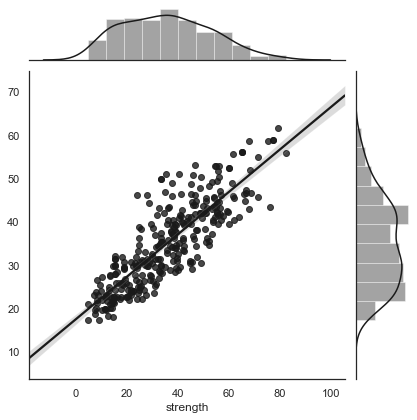

In [15]:
y_pred = svr.predict(x_test)
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [16]:
pearsonr(y_test, y_pred)

(0.8484198439665249, 8.153747065616766e-87)

In [17]:
# Analysing with svm model after dropping attributes
concrete_data2 = concrete_data. drop(['ash'], axis =1)

In [18]:
# Splitting into independent and target variables and scaling the independent variables
X1 = concrete_data2. drop('strength', axis =1)
Y1 = concrete_data2['strength']

X1Scaled = X1.apply(zscore)

#Splitting to train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(X1Scaled, Y1, test_size = 0.3, random_state = 1)
x1_train.head()

,cement,slag,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.856888,1.004164,-1.039143,0.013910,0.017714,-0.501465
286,0.888723,1.337055,-0.537264,0.652383,-0.602435,-0.210645,0.718062
600,-0.039901,-0.856888,0.441941,-1.039143,-0.063294,1.028482,-0.675683
691,0.946164,0.244722,2.175461,-1.039143,-0.526517,-2.240917,-0.612331
474,0.716401,-0.856888,0.535645,0.803113,-2.212138,0.055149,-0.279733


In [19]:
# Analysing with svm model
svr.fit(x1_train, y1_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
svr.score(x1_train, y1_train)

0.6407192372636216

In [21]:
svr.score(x1_test, y1_test)

0.6619631738791076

In [22]:
y1_pred = svr.predict(x1_test)
pearsonr(y1_test, y1_pred)

(0.8575297741305871, 1.266361716608001e-90)

Hence, since pearson score increases to 85 and also the train and test score improves, we can drop ash for further analysis.

# Dealing with outliers

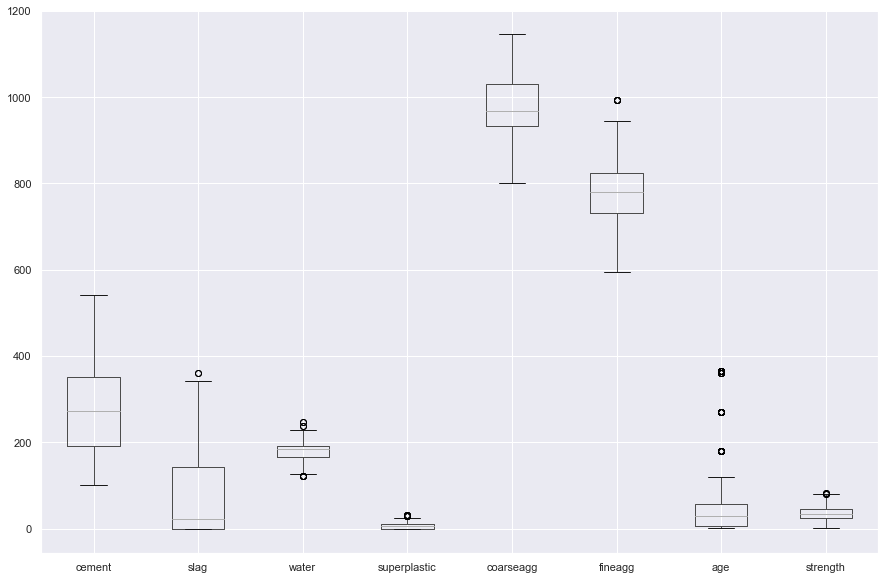

In [23]:
# Checking boxplot
import matplotlib.pylab as plt

concrete_data2.boxplot(figsize=(15, 10))

Here, using IQR score to filter out the outliers. Replacing the lower outliers with lower whisker and upper outliers with upper whisker.

In [24]:
#Calculating IQR
Q1 = concrete_data2.quantile(0.25)
Q3 = concrete_data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [25]:
# Rows without outlier
concrete_no_out = concrete_data2[~((concrete_data2 < (Q1 - 1.5 * IQR)) |(concrete_data2 > (Q3 + 1.5 * IQR))).any(axis=1)]
concrete_no_out.shape

(941, 8)

In [26]:
concrete_data2.shape

(1030, 8)

Here we see that 89 rows have outliers.

In [27]:
concrete_outlier = concrete_data2.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(concrete_outlier < Q1 - 1.5 * IQR)[0], np.where(concrete_outlier < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_outlier.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(concrete_outlier > Q3 + 1.5 * IQR)[0], np.where(concrete_outlier > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_outlier.iloc[i,j] = whisker[j]

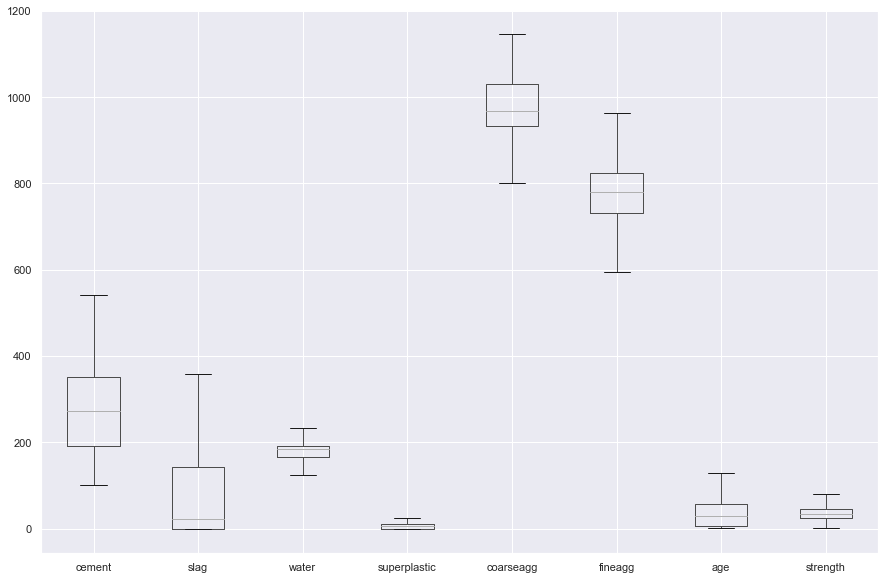

In [28]:
concrete_outlier.boxplot(figsize=(15, 10))

Thus, the outliers have been removed.

# Creating composite feature

In [29]:
#combining coarseagg and fineagg to a single attribute aggregates as a composite feature
concrete_outlier['aggregates'] = concrete_outlier['fineagg'] + concrete_outlier['coarseagg']

In [30]:
concrete_outlier.head()

,cement,slag,water,superplastic,coarseagg,fineagg,age,strength,aggregates
0,141.3,212.0,203.5,0.0,971.8,748.5,28.0,29.89,1720.3
1,168.9,42.2,158.3,10.8,1080.8,796.2,14.0,23.51,1877.0
2,250.0,0.0,187.4,5.5,956.9,861.2,28.0,29.22,1818.1
3,266.0,114.0,228.0,0.0,932.0,670.0,28.0,45.85,1602.0
4,154.8,183.4,193.3,9.1,1047.4,696.7,28.0,18.29,1744.1


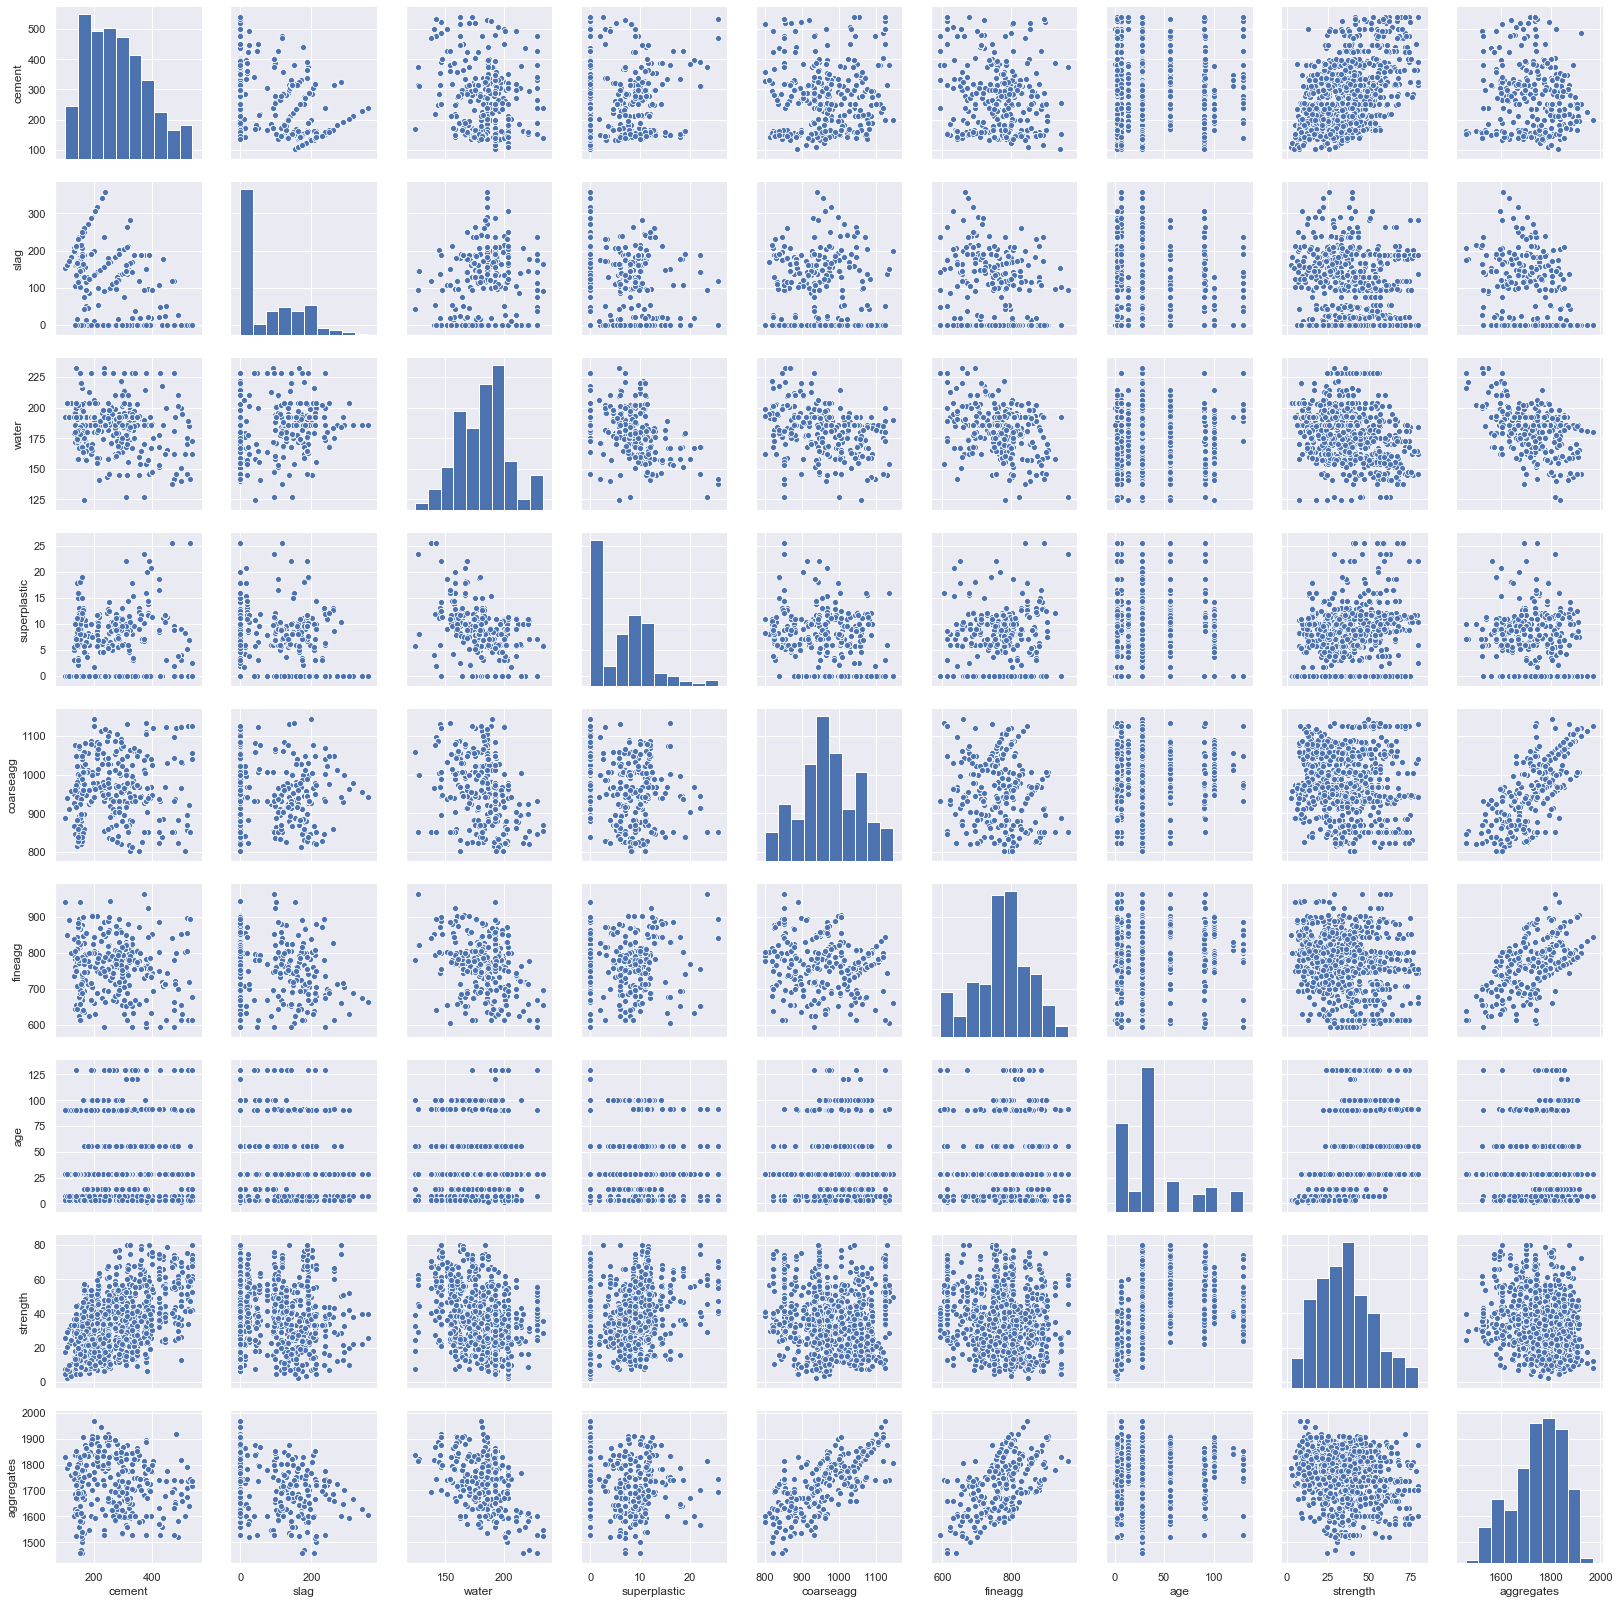

In [31]:
sns.pairplot(concrete_outlier)

Visually, the relation between target variable strength and fine and coarse aggregate was cloud-like. Combinig both to aggregates doesn't make much change. Thus, dropping fineagg and coarseagg and retaining aggregates instead.

In [32]:
concrete_1 = concrete_outlier.drop(['fineagg', 'coarseagg'], axis =1)
concrete_1.head()

,cement,slag,water,superplastic,age,strength,aggregates
0,141.3,212.0,203.5,0.0,28.0,29.89,1720.3
1,168.9,42.2,158.3,10.8,14.0,23.51,1877.0
2,250.0,0.0,187.4,5.5,28.0,29.22,1818.1
3,266.0,114.0,228.0,0.0,28.0,45.85,1602.0
4,154.8,183.4,193.3,9.1,28.0,18.29,1744.1


# K means clustering to check for clusters

In [33]:
#converting to Z score
concrete_1_z = concrete_1.apply(zscore)

In [34]:
#As observed earlier from pair plot there seems yo be multiple gaussians - a minimum of 5 and maximum of 15
#thus exploring individual cluster

cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(concrete_1_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,7210.000000
1,2,5744.963159
2,3,4713.653936
3,4,3985.900024
4,5,3487.157183
5,6,3166.078164
6,7,2906.638774
7,8,2687.452316
8,9,2521.851729
9,10,2351.768652


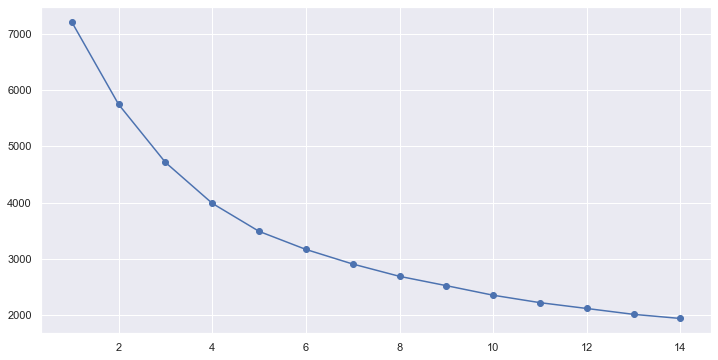

In [35]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [36]:
#Here, we can see the elbow at 6. Hence taking n_clusters =6
kmeans = KMeans(n_clusters= 6)
kmeans.fit(concrete_1_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[208 205 116 201 167 133]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF909C2F08>,
      dtype=object)

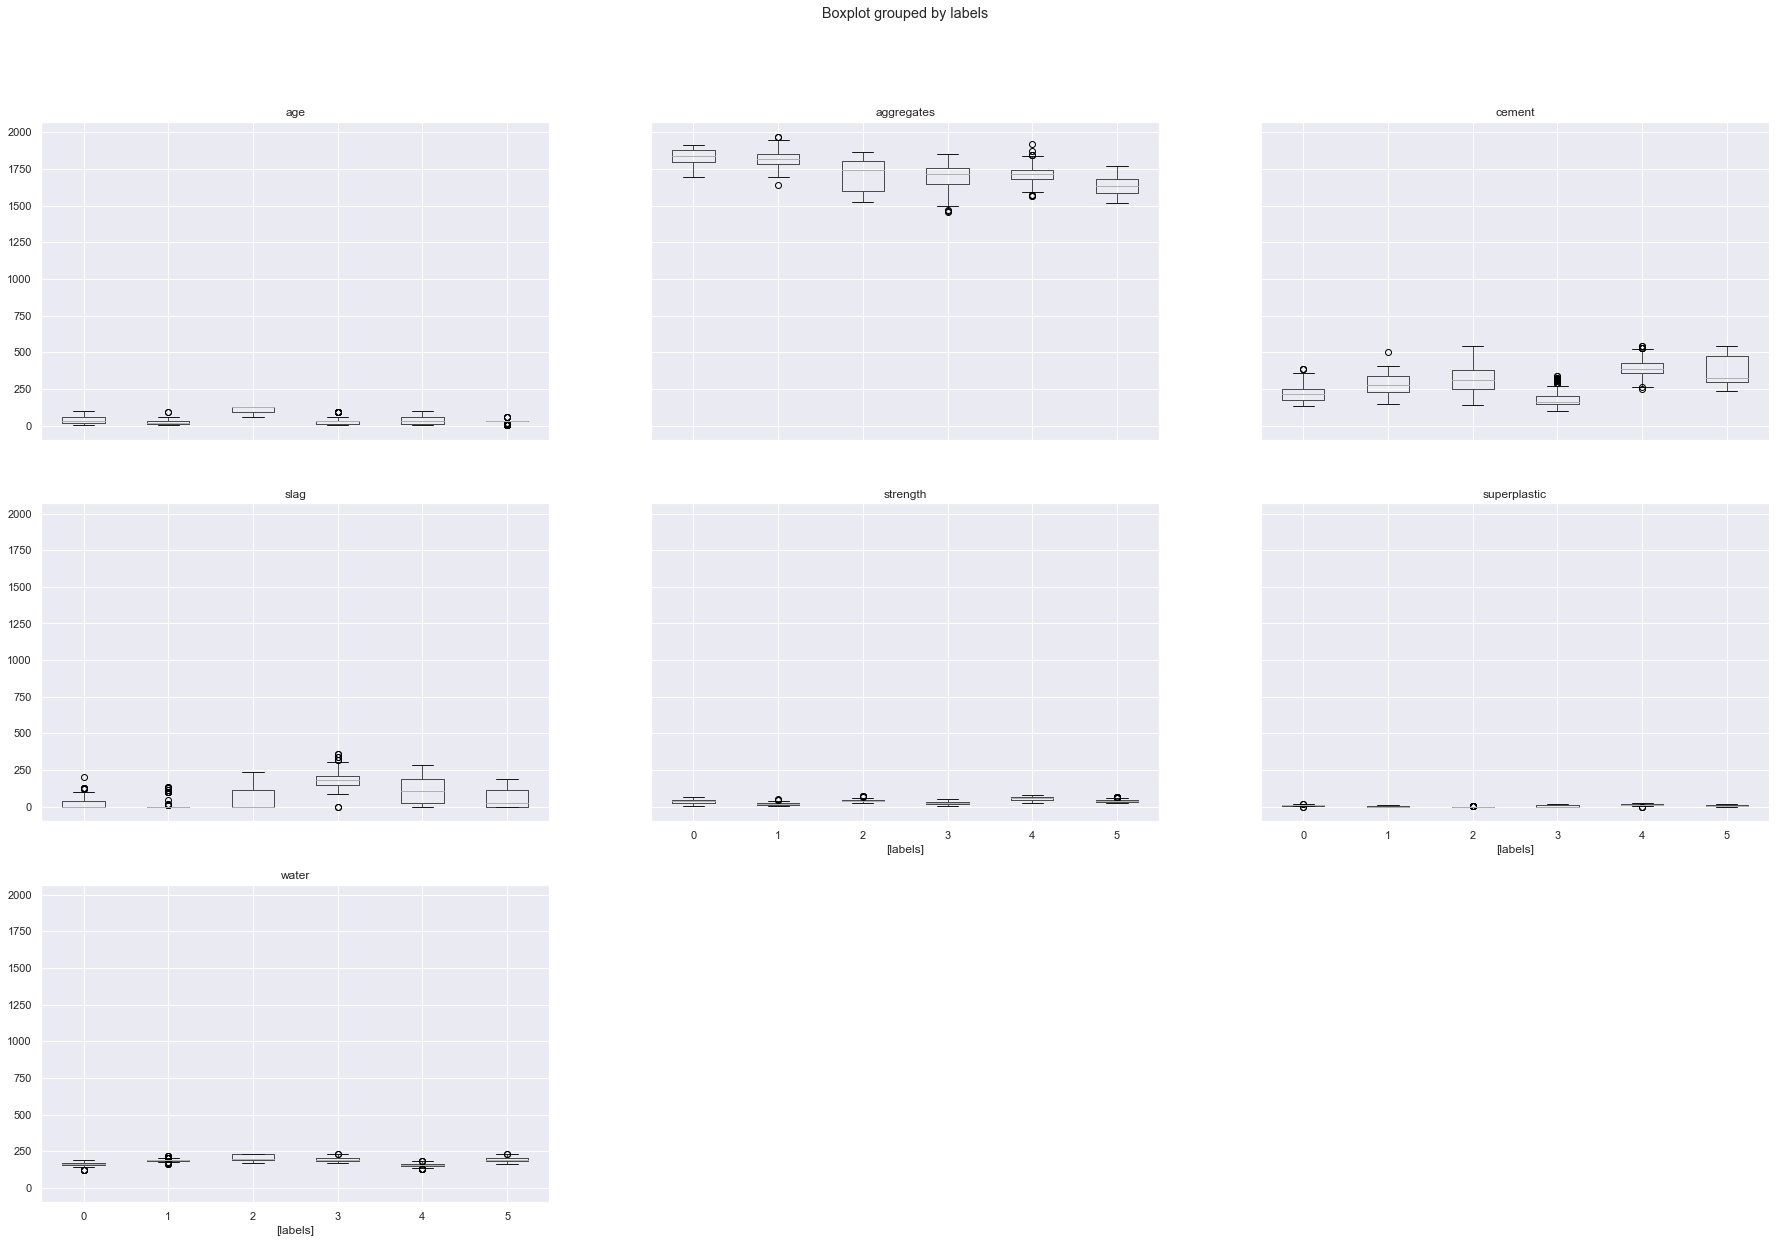

In [38]:
# creating dataframe for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
concrete_df_labeled = concrete_1.join(cluster_labels)

concrete_df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))

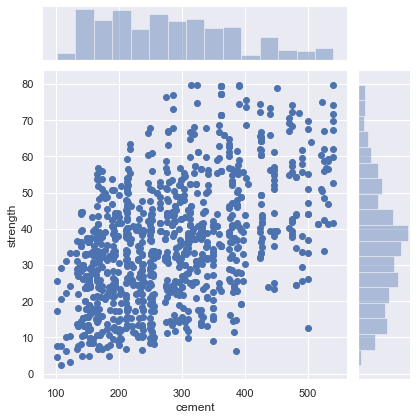

In [39]:
sns.jointplot(concrete_1['cement'], concrete_1['strength'])

1. Here, we do not see any distinct clusters. The attributes looks like weak predictors except for cement.
2. Thus, breaking into clusters does not look like a good approach.
3. From plot also, cement shows slightly linear relation. The rest of the attributes show complex relation.

In [39]:
# Splitting into independent and target variables and scaling the independent variables
X2 = concrete_1.drop('strength', axis =1)
Y2 = concrete_1['strength']

X2Scaled = X2.apply(zscore)

#Splitting to train and test
x2_train, x2_test, y2_train, y2_test = train_test_split(X2Scaled, Y2, test_size = 0.3, random_state = 1)
x2_train.head()

,cement,slag,water,superplastic,age,aggregates
185,0.658961,-0.856971,1.011407,-1.061968,-0.673017,0.026135
286,0.888723,1.337301,-0.539401,0.679520,1.479932,-0.628861
600,-0.039901,-0.856971,0.445763,-1.061968,-0.980581,0.768200
691,0.946164,0.244804,2.189833,-1.061968,-0.868740,-2.180271
474,0.716401,-0.856971,0.540037,0.834702,-0.281572,-1.655878


# Decision Tree to check feature importance

In [40]:
#Using Decision Tree Regressor
model1 = DecisionTreeRegressor()
model1.fit(x2_train, y2_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
#Checking feature importance
print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = x2_train.columns))

                   Imp
cement        0.353922
slag          0.098783
water         0.127862
superplastic  0.025275
age           0.337505
aggregates    0.056653


In [42]:
model1.score(x2_test, y2_test)

0.8279737714800843

In [43]:
model1.score(x2_train, y2_train)

0.9946394943315127

Here, as per feature importance, we can drop columns superplastic and aggregates.

In [44]:
c_data = concrete_1.drop(['aggregates', 'superplastic'], axis =1)

# Checking if linear model is enough

In [45]:
# Splitting into independent and target variables and scaling the independent variables
X3 = c_data.drop('strength', axis =1)
Y3 = c_data['strength']

X3Scaled = X3.apply(zscore)

#Splitting to train and test
x3_train, x3_test, y3_train, y3_test = train_test_split(X3Scaled, Y3, test_size = 0.3, random_state = 1)
x3_train.head()

,cement,slag,water,age
185,0.658961,-0.856971,1.011407,-0.673017
286,0.888723,1.337301,-0.539401,1.479932
600,-0.039901,-0.856971,0.445763,-0.980581
691,0.946164,0.244804,2.189833,-0.868740
474,0.716401,-0.856971,0.540037,-0.281572


In [46]:
#Checking simple linear model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

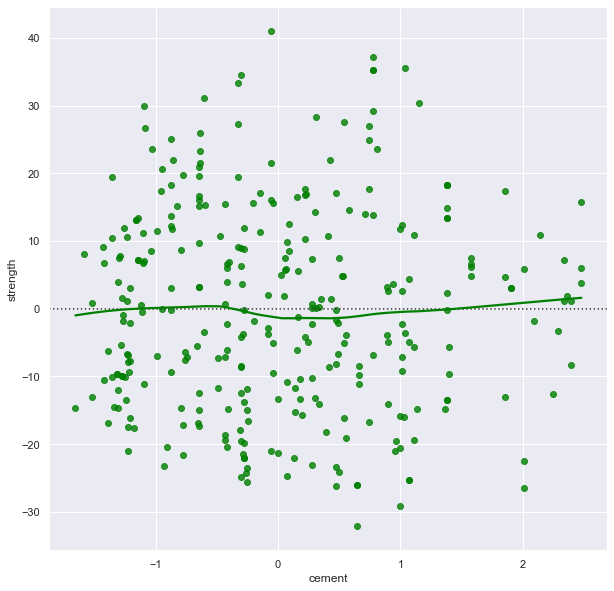

In [47]:
fig = plt.figure(figsize=(10,10))
sns.residplot(x= x3_test['cement'], y= y3_test, color='green', lowess=True )

Looks like  a simple linear model will not do as prediction leave out lot of points.

# Decision Tree after dropping attributes of less importance

In [48]:
#Using Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(x3_train, y3_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
dtr.score(x3_test, y3_test)

0.8442616310415153

In [50]:
dtr.score(x3_train, y3_train)

0.9932674694221357

Observed that the accuracy score has increased after dropping the attributes with less feature importance.

Models that can be tried are ensembe techniques such as Boosting, Bagging and Random Forest since they help to reduce overfitting and increase the accuracy.

# Ensemble techniques for model building

# Gradient Boosting

In [51]:
#Gradient Boosting
model1= GradientBoostingRegressor(n_estimators=100)
model1.fit(x3_train,y3_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
model1.score(x3_train, y3_train)

0.9363149430160931

In [53]:
model1.score(x3_test, y3_test)

0.8784229347355496

In [54]:
#Store the accuracy for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 'Accuracy training': 93.6, 'Accuracy test': 87.8})
resultsDf = resultsDf[['Method', 'Accuracy training', 'Accuracy test']]
resultsDf

,Method,Accuracy training,Accuracy test
0,Gradient Boosting Regressor,93.6,87.8


# Bagging Regressor

In [55]:
#Bagging Regressor

model2 = BaggingRegressor(n_estimators=100, oob_score= True)

model2.fit(x3_train, y3_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=True, random_state=None, verbose=0,
                 warm_start=False)

In [56]:
model2.score(x3_train,y3_train)

0.9801141187102249

In [57]:
model2.score(x3_test,y3_test)

0.8950867420881325

In [58]:
#Store the accuracy for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'Accuracy training': 98, 'Accuracy test': 89.5})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy training', 'Accuracy test']]
resultsDf

,Method,Accuracy training,Accuracy test
0,Gradient Boosting Regressor,93.6,87.8
0,Bagging Regressor,98.0,89.5


# Random Forest

In [59]:
#Random Forest
model3 = RandomForestRegressor(n_estimators=100)
model3.fit(x3_train,y3_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
model3.score(x3_train,y3_train)

0.9808650771893705

In [61]:
model3.score(x3_test,y3_test)

0.8935323688568874

In [62]:
#Store the accuracy for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'Accuracy training': 98, 'Accuracy test': 89.3})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy training', 'Accuracy test']]
resultsDf

,Method,Accuracy training,Accuracy test
0,Gradient Boosting Regressor,93.6,87.8
0,Bagging Regressor,98.0,89.5
0,Random Forest Regressor,98.0,89.3


The best in test accuracy seems to be for Bagging and Random Forest.

# Using Bootstrap to find model performance range at 95% confidence

In [63]:
c_data_z = c_data.apply(zscore)
values = c_data_z.values

#Configuring Bootstrapping for Random Forest Regressor
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(c_data_z)*1)    # size of a bootstrap sample

# run bootstrap
score_list = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    rfTree = RandomForestRegressor(n_estimators=100)  
    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)

    score_list.append(score)

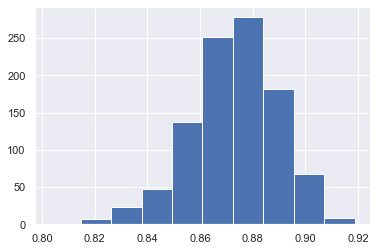

95.0 confidence interval 83.5% and 90.2%


In [64]:
# plot scores

from matplotlib import pyplot
pyplot.hist(score_list)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(score_list, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(score_list, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [66]:
#Configuring Bootstrapping for Bagging Regressor

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(c_data_z)*1)    # size of a bootstrap sample

# run bootstrap
score_bagging = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
    bTree = BaggingRegressor(n_estimators=100)
    bTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = bTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = bTree.score(test[:, :-1] , y_test)

    score_bagging.append(score)

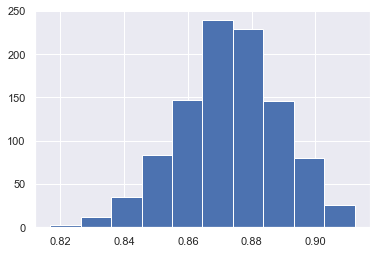

95.0 confidence interval 83.9% and 90.3%


In [76]:
# plot scores

from matplotlib import pyplot
pyplot.hist(score_bagging)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(score_bagging, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(score_bagging, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

1. Model performance range at 95% confidence level for Random forest is 83.5 and 90.2.
2. Model performance range at 95% confidence level for Bagging is 83.9 and 90.3.
3. Going for Random Forest as it has slightly higher performance range

# Tuning using hyperparameters

In [68]:
#Retreiving the parameters currently in use
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# Random Search CV

In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 20, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 15, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20]}


In [70]:
#Using random grid for best parameter and fitting the model
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 4, scoring='neg_mean_absolute_error', 
                              cv = 4, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(x3_train,y3_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.9s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [71]:
#Best parameters
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [72]:
#Best ensemble model
best_random = rf_random.best_estimator_ 

In [73]:
best_random.score(x3_test,y3_test)

0.8935512513571207

In [74]:
#Checking model performance with the above parameters:
#Configuring Bootstrapping for Random Forest Regressor
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(c_data_z)*1)    # size of a bootstrap sample

# run bootstrap
score_list = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    rfTree = RandomForestRegressor(n_estimators=20, min_samples_split=5, min_samples_leaf=1, max_features ='log2', max_depth=None, bootstrap=False)  
    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)

    score_list.append(score)

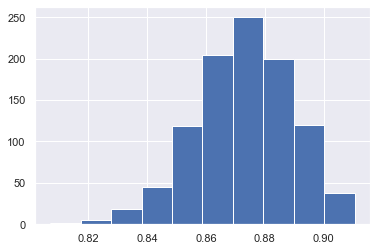

95.0 confidence interval 83.9% and 90.3%


In [75]:
# plot scores

from matplotlib import pyplot
pyplot.hist(score_list)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(score_list, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(score_list, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Inference

1. Random forest has been used to make the prediction with a model performance range of 83.8% to 90.3%.
2. There is only a very slight increase in performance with the use of Random Search CV.